In [1]:
# Import dependencies
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#from tensorflow.keras.callbacks import ModelCheckpoint
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from config import pw_postgres

In [2]:
# Import and read data

DB_PASS = pw_postgres
aws_database = 'shrbfk-final-project.cuitpsvagrne.us-east-2.rds.amazonaws.com:5432'
db_string = "postgresql+psycopg2://postgres:" + DB_PASS + "@" + aws_database + "/vet_data"
try:
    db_engine = create_engine(db_string)
    
except Exception as e:
    print(f"\nFailed to create database connection to {aws_database}.\n", e)
    exit()
    
combined_df = pd.read_sql_table('people_vet_join', db_engine)

In [3]:
combined_df.head()

,FIPS,State,County,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,...,WhiteVetsPct,BlackVetsPct,HispanicVetsPct,OtherRaceVetsPct,LessThanHSVetsPct,HighSchOnlyVetsPct,SomeCollegeVetsPct,CollegeDegreeVetsPct,EmployeedVetsPct,UnemployeedVetsPct
0,1000,AL,Alabama,0.317,2.461,4903185,1.059,1.402,0.809,7.48,...,72.534198,22.945607,2.022065,3.059596,6.396034,28.257189,37.385370,27.961408,71.330519,4.319786
1,1001,AL,Autauga,0.605,2.001,55869,0.686,1.315,-0.029,24.96,...,84.028832,9.673748,5.576631,1.119120,3.007812,20.859375,31.621094,44.511719,86.549340,3.558460
2,1003,AL,Baldwin,2.469,21.911,223234,21.001,0.910,0.714,29.80,...,90.621980,5.360321,1.439251,2.929360,3.612916,27.659792,36.676731,32.050560,74.927707,3.430532
3,1005,AL,Barbour,-0.748,-9.664,24686,-8.797,-0.867,0.161,-5.44,...,59.563253,37.349398,1.054217,3.087349,12.349398,39.834337,36.746988,11.069277,49.752066,9.966777
4,1007,AL,Bibb,0.121,-2.081,22394,-2.099,0.017,0.525,10.03,...,79.134682,18.492673,2.372645,0.000000,6.901510,54.708843,22.286125,16.103523,56.901408,0.000000


In [4]:
df_labels = combined_df[['State', 'County']]
combined_df = combined_df.drop(columns=['FIPS', 'State', 'County'])
#combined_df = combined_df.drop

In [5]:
combined_df = combined_df.drop([0,68,102,118,194,253,318,331,333,401,561,567,612,715,808,908,1014,
               1135,1200,1217,1242,1257,1341,1429,1512,1628,1685,1779,1797,1808,1830,
               1864,1927,2028,2082,2171,2249,2286,2354,2360,2407,2474,2570,2825,
               2855,2870,3005,3045,3101,3174])

In [6]:
# Drop non-helpful columns(if there are any)
#combined_df.drop(columns=['columnname1', 'columnname2'], axis=1, inplace=True)
combined_df.head()

,PopChangeRate1819,PopChangeRate1019,TotalPopEst2019,NetMigrationRate1019,NaturalChangeRate1019,Net_International_Migration_Rate_2010_2019,PopChangeRate0010,NetMigrationRate0010,NaturalChangeRate0010,Immigration_Rate_2000_2010,...,WhiteVetsPct,BlackVetsPct,HispanicVetsPct,OtherRaceVetsPct,LessThanHSVetsPct,HighSchOnlyVetsPct,SomeCollegeVetsPct,CollegeDegreeVetsPct,EmployeedVetsPct,UnemployeedVetsPct
1,0.605,2.001,55869,0.686,1.315,-0.029,24.96,11.87,5.46,-0.010222,...,84.028832,9.673748,5.576631,1.119120,3.007812,20.859375,31.621094,44.511719,86.549340,3.558460
2,2.469,21.911,223234,21.001,0.910,0.714,29.80,26.17,3.32,1.584455,...,90.621980,5.360321,1.439251,2.929360,3.612916,27.659792,36.676731,32.050560,74.927707,3.430532
3,-0.748,-9.664,24686,-8.797,-0.867,0.161,-5.44,-4.80,2.29,1.828365,...,59.563253,37.349398,1.054217,3.087349,12.349398,39.834337,36.746988,11.069277,49.752066,9.966777
4,0.121,-2.081,22394,-2.099,0.017,0.525,10.03,6.43,2.10,0.341485,...,79.134682,18.492673,2.372645,0.000000,6.901510,54.708843,22.286125,16.103523,56.901408,0.000000
5,0.095,0.784,57826,-0.005,0.790,0.207,12.34,12.27,3.14,2.077015,...,94.293240,1.287679,2.985075,2.985075,11.655901,33.734586,38.667058,15.942454,64.528302,7.309942


In [7]:
combined_df.dropna(inplace=True)

In [8]:
# Split into features and target arrays
y = combined_df['TotalVets'].values
X = combined_df.drop(['TotalVets'],1).values

In [9]:
# Split preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42)

In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
X_train_scaled

array([[ 0.2951165 ,  0.65048522, -0.14118529, ...,  1.99336862,
         0.89300648,  0.71348418],
       [ 0.02850764,  0.21536787, -0.13994579, ..., -0.76741802,
         0.44777306,  0.78743302],
       [-2.51927335, -1.33102864, -0.15359708, ..., -0.29951532,
        -1.83759152, -0.78734949],
       ...,
       [ 0.75001788,  0.98638939, -0.05318423, ..., -0.28673915,
         1.04501186, -0.22625812],
       [ 0.43425301, -0.63642188, -0.15477456, ..., -0.69628788,
        -0.84904017,  0.95152914],
       [ 0.05350222, -0.82568304, -0.15352894, ..., -0.89895441,
         0.98687687,  0.34693442]])

In [12]:
# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, lin_reg_y_pred)
rmse = np.sqrt(mse)
print(rmse)
#print(mse)

27648.70193366979


In [13]:
r2_score(y_test, lin_reg_y_pred)

0.8772430235074382

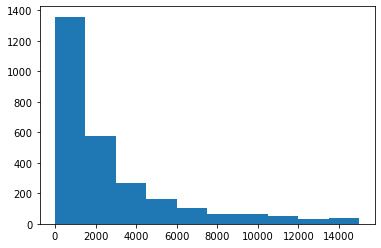

In [14]:
plt.hist(y, 10, range=[0,15000])
plt.show()

In [15]:
#STOP HERE 

In [16]:
#y_test

In [17]:
#y

In [18]:
# Fitting Random Forest Regression to the dataset
#regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
#regressor.fit(X.reshape(-1,1), y.reshape(-1, 1))

In [19]:
#ridge = Ridge()
#ridge.fit(X_train, y_train)
#y_pred_ridge = ridge.predict(X_test)
#mse = mean_squared_error(y_test, y_pred_ridge)
#rmse = np.sqrt(mse)
#print(rmse)

In [20]:
#lasso = Lasso()
#lasso.fit(X_train, y_train)
#y_pred_lasso = lasso.predict(X_test)
#mse = mean_squared_error(y_test, y_pred_lasso)
#print(mse)